In [22]:
print(lyn_med_kommune.head())

print(lyn_med_kommune.columns)


             timestamp      lat      lon                 geometry  \
0  2022-07-01 11:41:03  63.9957  13.9321  POINT (13.9321 63.9957)   
1  2022-07-01 11:41:03  63.9950  13.9330    POINT (13.933 63.995)   
2  2022-07-01 11:41:03  63.9959  13.8986  POINT (13.8986 63.9959)   
3  2022-07-01 11:41:03  63.9972  13.8826  POINT (13.8826 63.9972)   
4  2022-07-01 11:41:03  64.0077  13.9063  POINT (13.9063 64.0077)   

   index_right   y  poly_id  area  malemetode  oppr  ... h_malemeto  \
0          NaN NaN      NaN   NaN         NaN   NaN  ...        NaN   
1          NaN NaN      NaN   NaN         NaN   NaN  ...        NaN   
2          NaN NaN      NaN   NaN         NaN   NaN  ...        NaN   
3          NaN NaN      NaN   NaN         NaN   NaN  ...        NaN   
4          NaN NaN      NaN   NaN         NaN   NaN  ...        NaN   

   max_avvik  komm  poly_   x  synbarhet  noyaktighe  navn  perimeter  \
0        NaN   NaN    NaN NaN        NaN         NaN   NaN        NaN   
1        NaN

C:\Users\jakob\AppData\Local\Temp\ipykernel_12156\2776430257.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  lyn = pd.concat(lyn_liste, ignore_index=True)


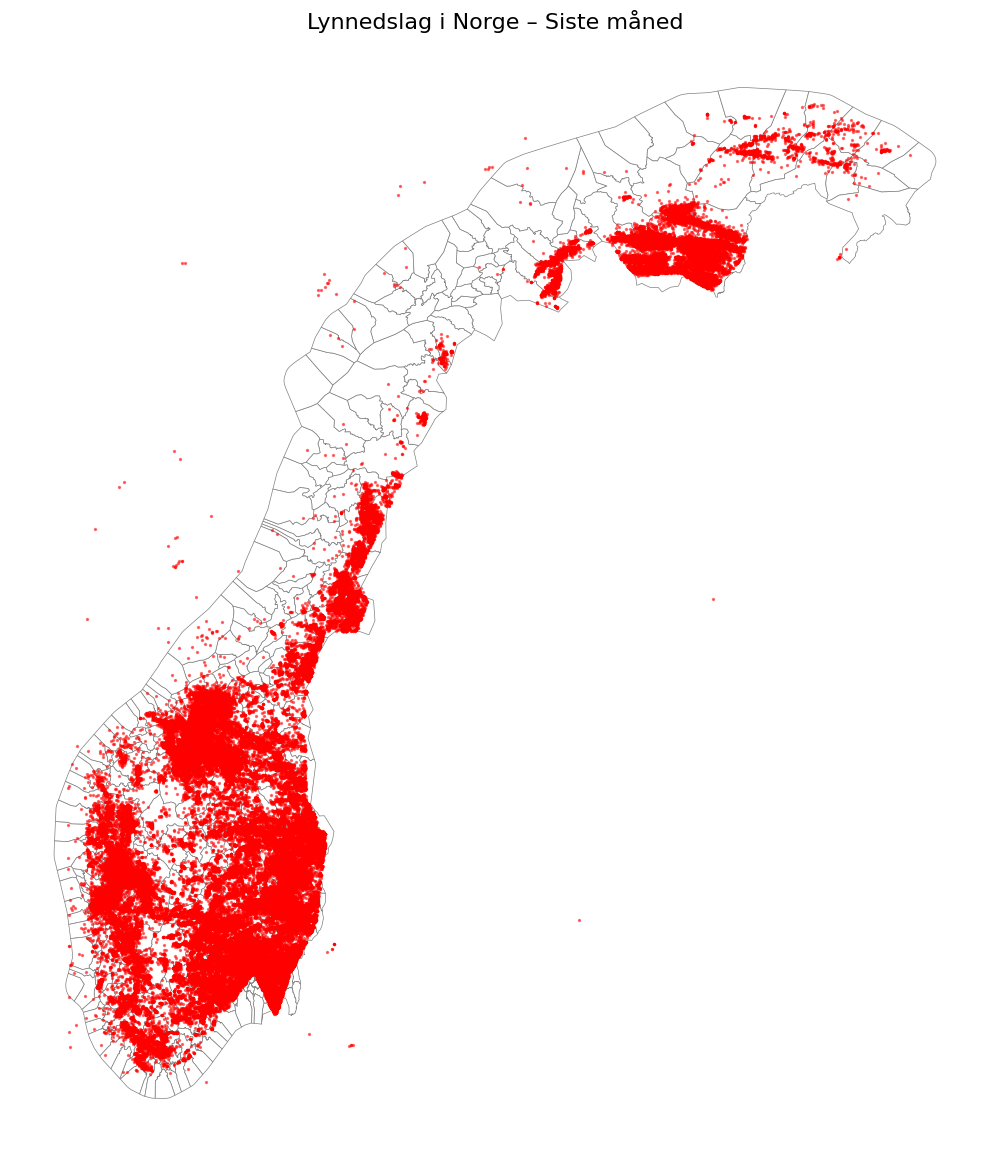

Topp 10 kommuner med flest lynnedslag:
kommune
Guovdageaidnu  Kautokeino    13962
Sunndal                        3820
Trysil                         3150
Kárásjohka  Karasjok          2911
Voss                           2861
Surnadal                       2177
Lesja                          2073
Rauma                          1988
Nesset                         1972
Elverum                        1922
Name: count, dtype: int64


In [24]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import os

# 1. Les kommunegrenser
komm = gpd.read_file("https://raw.githubusercontent.com/kjhealy/norway/master/geojson/kommuner.geojson").to_crs("EPSG:4326")

# 2. Les og slå sammen alle lynnedslag
lyn_dir = "lyn_per_dag"
alle_filer = [f for f in os.listdir(lyn_dir) if f.endswith(".csv")]
lyn_liste = [pd.read_csv(os.path.join(lyn_dir, f)) for f in alle_filer]
lyn = pd.concat(lyn_liste, ignore_index=True)

# 3. Lag GeoDataFrame
lyn_gdf = gpd.GeoDataFrame(lyn, geometry=gpd.points_from_xy(lyn["lon"], lyn["lat"]), crs="EPSG:4326")

# 4. Tegn kart
fig, ax = plt.subplots(figsize=(10, 12))
komm.plot(ax=ax, edgecolor="gray", facecolor="white", linewidth=0.5)
lyn_gdf.plot(ax=ax, color="red", markersize=2, alpha=0.5)
ax.set_title("Lynnedslag i Norge – Siste måned", fontsize=16)
ax.set_axis_off()
plt.tight_layout()
plt.show()

# 5. Topp 10 kommuner
topp10 = lyn["kommune"].value_counts().head(10)
print("Topp 10 kommuner med flest lynnedslag:")
print(topp10)


In [28]:
import pandas as pd
import glob
from datetime import datetime

# Hent alle filer i perioden
alle_filer = sorted(glob.glob("lyn_per_dag/*.csv"))
startdato = datetime(2025, 6, 21).date()

# Filtrer til siste måned
relevante_filer = [f for f in alle_filer if pd.to_datetime(os.path.basename(f).split(".")[0]) >= pd.Timestamp(startdato)]

# Slå sammen
df = pd.concat([pd.read_csv(f) for f in relevante_filer], ignore_index=True)

# Lagre hvis ønskelig
df.to_csv("lyn_sammenslått_siste_måned.csv", index=False)


C:\Users\jakob\AppData\Local\Temp\ipykernel_12156\2729859907.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([pd.read_csv(f) for f in relevante_filer], ignore_index=True)


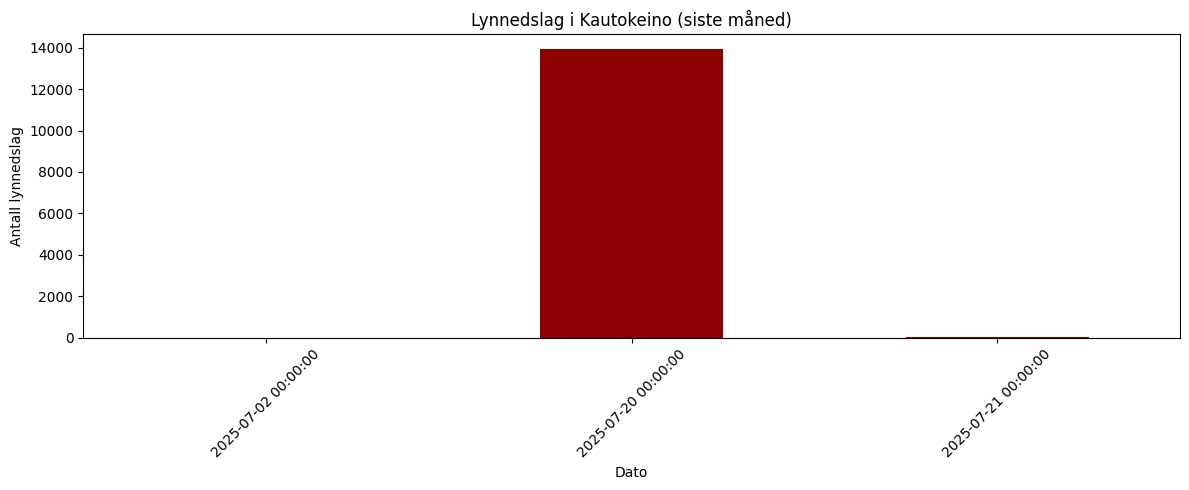

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Last inn dataene
lyn_df = pd.read_csv("lyn_sammenslått_siste_måned.csv", parse_dates=["dato"])

# Fjern ukontrollerte tegn og filtrer fleksibelt
lyn_df["kommune"] = lyn_df["kommune"].astype(str).str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

# Filtrer på Kautokeino
lyn_kauto = lyn_df[lyn_df["kommune"].str.contains("kauto", case=False, na=False)]

# Aggreger per dag
dagstall = lyn_kauto.groupby("dato").size()

# Plot
plt.figure(figsize=(12, 5))
dagstall.plot(kind="bar", color="darkred")
plt.title("Lynnedslag i Kautokeino (siste måned)")
plt.xlabel("Dato")
plt.ylabel("Antall lynnedslag")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
